In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
import pandas as pd

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import math

In [6]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('/Users/samhithraj/Desktop/capstone/train_bodies.csv',nrows=100)
alltext=list(data['articleBody'])

In [8]:
print(alltext[3])

Posting photos of a gun-toting child online, ISIS supporters announced that the group’s youngest soldier has died in combat.

Twitter accounts linked to the Islamic State of Iraq and Al-Sham claimed that the child soldier “got martyred” with his father while fighting for the terrorist group in Syria.

Photos posted on Twitter showed the smiling boy in military fatigues holding weapons that, at times, are almost as large as his body. British media reported that the child was roughly 10 years old.

The photos of the boy first emerged in June, said Charlie Cooper, a researcher who monitors ISIS social media for the London-based Quilliam counter-extremism think tank.
In the past week, Mr. Cooper has noticed the hashtag “shibal_alBaghdadi” — which translates as “the cub of Baghdadi” — on Twitter accounts linked to ISIS.

While ISIS fighters commonly refer to themselves as lions of the Islamic State, Mr. Cooper said, they refer to child soldiers as cubs of Abu Bakr Al-Baghdadi, ISIS’s self-p

In [9]:
string_punctuation="!\"#$%&'()*+,O-—.’/:;<=>?@[\]^_`{|}~“”"
string_punctuation=list(string_punctuation)   
string_punctuation.append('...')
string_punctuation.append('*')
string_punctuation.append('``')
string_punctuation.append("''")
print(string_punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', 'O', '-', '—', '.', '’', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '“', '”', '...', '*', '``', "''"]


In [10]:
def preprocess(input_txt):
    result = re.sub(r'\d+','', input_txt)
    result = re.sub('\S*@\S*\s?', '', input_txt)  # remove emails
    result = re.sub('\s+', ' ', input_txt)  # remove newline chars
    result = re.sub("\'", "", input_txt)  # remove single quotes
    tokens = word_tokenize(result)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    #print("TOKENS:"tokens)

    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stems = []
    for t in tokens:    
        stems.append(porter.stem(t))
    #print('after stemming:'stems)
    
    for symbol in stems:
        if symbol in string_punctuation:
            stems.remove(symbol)
    return stems

In [11]:
data=[]
# for i in range(len(alltext)):
#     tfidf_vectorizer = TfidfVectorizer(preprocess(alltext[i]))
#     tfidf.append(tfidf_vectorizer.fit_transform(alltext))
for i in range(len(alltext)):
    data.append(preprocess(alltext[i]))

In [12]:
#data =list(gensim.utils.simple_preprocess(str(data), deacc=True)) 
print(data)

[['A', 'small', 'meteorit', 'crash', 'wood', 'area', 'nicaragua', 'capit', 'managua', 'overnight', 'govern', 'said', 'sunday', 'resid', 'report', 'hear', 'mysteri', 'boom', 'left', '16-foot', 'deep', 'crater', 'near', 'citi', 'airport', 'associ', 'press', 'report', 'govern', 'spokeswoman', 'rosario', 'murillo', 'said', 'committe', 'form', 'govern', 'studi', 'event', 'determin', 'rel', 'small', 'meteorit', 'appear', 'come', 'asteroid', 'pass', 'close', 'earth', "''", 'house-s', 'asteroid', '2014', 'RC', 'measur', '60', 'feet', 'diamet', 'skim', 'earth', 'weekend', 'abc', 'new', 'report', 'murillo', 'said', 'nicaragua', 'ask', 'intern', 'expert', 'help', 'local', 'scientist', 'understand', 'happen', 'the', 'crater', 'left', 'meteorit', 'radiu', '39', 'feet', 'depth', '16', 'feet', 'said', 'humberto', 'saballo', 'volcanologist', 'nicaraguan', 'institut', 'territori', 'studi', 'committe', 'He', 'said', 'still', 'clear', 'meteorit', 'disintegr', 'buri', 'humberto', 'garcia', 'astronomi', 'c

In [13]:
tfidf_vectorizer = TfidfVectorizer(data)
   

In [14]:
tfidf_matrix=tfidf_vectorizer.fit_transform(alltext)

In [15]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['00', '000', '000000', '000ft', '0054321535', '0325', '044', '05', '06', '07', '08', '10', '100', '101st', '11', '110', '12', '13', '133', '13th', '14', '15', '150', '159th', '16', '1652', '169', '17', '170', '1795', '18', '1855', '19', '1973', '1974', '1978', '198', '1980', '1990', '1992', '1995', '1998', '19th', '1c8834441f20e22a0aef009c095a6cab', '1st', '20', '200', '2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2014haven', '2014my', '2014the', '2015', '2016', '2017', '2020s', '21', '217', '21st', '22', '23', '24', '24in', '25', '250', '252', '26', '27', '273', '28', '280', '286', '29', '29g', '2am', '2nd', '30', '300', '300x250', '31', '32', '34', '346', '349', '35', '350', '36', '360', '3600', '39', '3pm', '40', '400x404', '41', '42', '43', '4331', '434', '44', '45', '460', '468', '468x60_as', '48', '4gb', '50', '500', '50s', '512mb', '542', '550', '550x550', '60', '602', '65', '66', '6608306193529351', '67', '68', '69', '

In [16]:
kmeans = KMeans(n_clusters=20).fit(tfidf_matrix)

In [17]:
print(kmeans.labels_)

[19 19 19  0  8 19 18  7 19 19  0 19 19 18 19  7 19 19 19 19 19 19  0  4
  0  9  6  1  3 17  2  5 16  6 11 14 13 19  0 19  0  1  8  1 19 16  3 19
 19  7 17  0  5 19 19 19  9  0 19 19 19 19 19 13  2 19 19  3  6 17 15  9
 19 12  2 13  1 19 12  4  4 19  0  3 19 19 17  1 14 19 19  0 19 10 17  9
 19  4  9 19]


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [19]:
centers=kmeans.cluster_centers_
print(centers)

[[0.         0.00555536 0.         ... 0.         0.00483882 0.00255772]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01751473 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00934495 0.         ... 0.         0.         0.        ]
 [0.         0.03646763 0.         ... 0.         0.         0.        ]
 [0.         0.00951743 0.         ... 0.0017269  0.         0.        ]]


In [20]:
print(centers.shape)

(20, 6258)


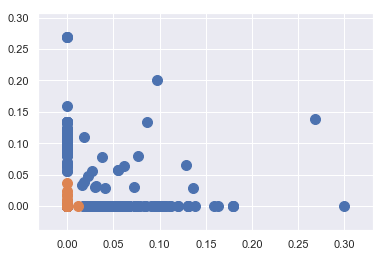

In [21]:
plt.scatter(tfidf_matrix[0].toarray(),tfidf_matrix[1].toarray(),s=100)
plt.scatter(centers[:, 0], centers[:, 1], s=100)

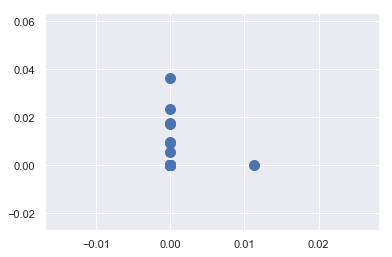

In [22]:
plt.scatter(centers[:, 0], centers[:, 1], s=100);

In [23]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(20):
    print("Cluster %d:" % i)
    k=[]
    for ind in order_centroids[i, :30]:
        k.append(terms[ind])
    print(k)    

Cluster 0:
['the', 'in', 'to', 'of', 'islamic', 'isis', 'and', 'state', 'syria', 'is', 'al', 'said', 'that', 'as', 'on', 'syrian', 'iraq', 'obama', 'us', 'military', 'foley', 'against', 'man', 'child', 'group', 'militants', 'for', 'government', 'his', 'has']
Cluster 1:
['kim', 'the', 'korea', 'north', 'his', 'he', 'of', 'in', 'health', 'jong', 'source', 'to', 'said', 'un', 'and', 'is', 'power', 'pyongyang', 'korean', 'has', 'snake', 'that', 'public', 'official', 'september', 'not', 'injury', 'from', 'since', 'gout']
Cluster 2:
['the', 'helmet', 'sniper', 'marine', 'afghanistan', 'video', 'helmand', 'arnold', 'raid', 'helicopter', 'province', 'to', 'zad', 'of', 'in', 'marines', 'joint', 'bullet', 'district', 'uploaded', 'watch', '2013', 'veteran', 'headshot', 'sam', 'kevlar', 'taliban', 'saved', 'us', 'conducting']
Cluster 3:
['apple', 'watch', 'the', 'to', 'app', 'ebay', 'will', 'iphone', 'gold', 'ad', 'for', 'igen', 'that', 'fr', 'of', 'be', 'cook', 'and', 'model', 'user', 'an', '2015

In [24]:
from pprint import pprint


In [25]:
cluster8=[]
order_centroids1 = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(20):
    cluster=[]
    for ind in order_centroids1[i, :]:
        cluster.append(terms[ind])
    cluster8.append(cluster)
print(cluster8)    


[['the', 'in', 'to', 'of', 'islamic', 'isis', 'and', 'state', 'syria', 'is', 'al', 'said', 'that', 'as', 'on', 'syrian', 'iraq', 'obama', 'us', 'military', 'foley', 'against', 'man', 'child', 'group', 'militants', 'for', 'government', 'his', 'has', 'with', 'they', 'forces', 'iraqi', 'are', 'he', 'shabab', 'airstrikes', 'baghdadi', 'air', 'journalist', 'sotloff', 'american', 'from', 'video', 'she', 'was', 'who', 'boy', 'city', 'have', 'strikes', 'while', 'were', 'abu', 'into', 'been', 'an', 'by', 'my', 'we', 'godane', 'mr', 'year', 'be', 'kurdish', 'it', 'last', 'daughter', 'killed', 'jets', 'john', 'somalia', 'fighters', 'james', 'not', 'kobane', 'their', 'also', 'town', 'president', 'fighter', 'weapons', 'being', 'at', 'after', 'one', 'two', 'soldiers', 'country', 'killers', 'black', 'cooper', 'girl', 'people', '40', 'old', 'says', 'young', 'punishment', 'nusra', 'your', 'this', 'will', 'years', 'social', 'kobani', 'fighting', 'seized', 'married', 'dulaimi', 'lebanese', 'dna', 'media'

In [26]:
for i in range(20):    
    clusters=[]
    clusters.append(cluster8[i])
    print(clusters)

[['the', 'in', 'to', 'of', 'islamic', 'isis', 'and', 'state', 'syria', 'is', 'al', 'said', 'that', 'as', 'on', 'syrian', 'iraq', 'obama', 'us', 'military', 'foley', 'against', 'man', 'child', 'group', 'militants', 'for', 'government', 'his', 'has', 'with', 'they', 'forces', 'iraqi', 'are', 'he', 'shabab', 'airstrikes', 'baghdadi', 'air', 'journalist', 'sotloff', 'american', 'from', 'video', 'she', 'was', 'who', 'boy', 'city', 'have', 'strikes', 'while', 'were', 'abu', 'into', 'been', 'an', 'by', 'my', 'we', 'godane', 'mr', 'year', 'be', 'kurdish', 'it', 'last', 'daughter', 'killed', 'jets', 'john', 'somalia', 'fighters', 'james', 'not', 'kobane', 'their', 'also', 'town', 'president', 'fighter', 'weapons', 'being', 'at', 'after', 'one', 'two', 'soldiers', 'country', 'killers', 'black', 'cooper', 'girl', 'people', '40', 'old', 'says', 'young', 'punishment', 'nusra', 'your', 'this', 'will', 'years', 'social', 'kobani', 'fighting', 'seized', 'married', 'dulaimi', 'lebanese', 'dna', 'media'

In [27]:
def findtopic(i):  
    clusters=[]
    clusters.append(cluster8[i])
    #print(clusters)

    id2word = corpora.Dictionary(clusters)

    corpus = [id2word.doc2bow(text) for text in clusters]


    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=20, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)

    pprint(lda_model.print_topics())
    del corpus,lda_model,clusters

In [28]:
for i in range(20):
    findtopic(i)

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

[(0,
  '0.000*"after" + 0.000*"able" + 0.000*"ties" + 0.000*"65" + 0.000*"filth" + '
  '0.000*"section" + 0.000*"breath" + 0.000*"unlawful" + 0.000*"ablaze" + '
  '0.000*"gen"'),
 (1,
  '0.000*"sunlight" + 0.000*"regime" + 0.000*"dimension" + '
  '0.000*"interpretation" + 0.000*"cover" + 0.000*"97" + 0.000*"seemingly" + '
  '0.000*"already" + 0.000*"ayr" + 0.000*"winter"'),
 (2,
  '0.000*"lives" + 0.000*"gangs" + 0.000*"rumours" + 0.000*"prices" + '
  '0.000*"inhale" + 0.000*"filming" + 0.000*"learn" + 0.000*"regrets" + '
  '0.000*"obamaisis" + 0.000*"presbyterian"'),
 (3,
  '0.002*"dick" + 0.002*"da14" + 0.002*"burying" + 0.002*"shoutout" + '
  '0.002*"vehicles" + 0.002*"1973" + 0.002*"records" + 0.002*"addiction" + '
  '0.002*"funny" + 0.002*"google_ad_width"'),
 (4,
  '0.000*"corrective" + 0.000*"willing" + 0.000*"inspector" + '
  '0.000*"production" + 0.000*"territory" + 0.000*"propaganda" + '
  '0.000*"denied" + 0.000*"strange" + 0.000*"needed" + 0.000*"miles"'),
 (5,
  '0.000*"na

In [29]:
out=[
  "after" ,"ties" ,"able" ,"65" ,"filth" ,
  "breath" ,"section" ,"unlawful" ,"ablaze" ,
  "gen",
  "sunlight" ,"regime" ,"dimension" ,
  "interpretation" ,"cover" ,"97" ,"seemingly" ,
  "already" ,"ayr" ,"winter",
  "lives" ,"gangs" ,"rumours" ,"inhale" ,
  "prices" ,"regrets" ,"filming" ,"learn" ,
  "presbyterian" ,"obamaisis",
  "somewhat" ,"dick" ,"sound" ,"burying" ,
  "but" ,"smile" ,"climate" ,"da14" ,
  "records" ,"addiction",
  "corrective" ,"inspector" ,"propaganda" ,
  "strange" ,"production" ,"denied" ,"territory" ,
  "needed" ,"willing" ,"miles",
  "hockey" ,"bugatti" ,"liverpool" ,"wins" ,
  "posting" ,"pronouncement" ,"generator" ,
  "molested" ,"writing" ,"ongoing",
  "traces" ,"clicking" ,"kurdish" ,"payment" ,
  "unclear" ,"perch" ,"asteroid" ,"50s" ,
  "premium" ,"bent",
  "coors" ,"cowen" ,"fast" ,"plumber" ,"di" 
  ,"both" ,"rural" ,"sometimes" ,"ams" ,
  "floor",
  "usurped" ,"adds" ,"late" ,"kctv5" ,
  "discipline" ,"questions" ,"fights" ,
  "perpetrated" ,"ever" ,"butcher",
  "independent" ,"gateway" ,"gumtree" ,"charges" ,
  "libyan" ,"supplies" ,"occurred" ,"spinning" ,
  "insisted" ,"dhs",
  "many" ,"hopefully" ,"arm" ,"b397876112" ,
  "across" ,"casualty" ,"second" ,"militiamen" ,
  "phenomena" ,"residents",
  "unduly" ,"neither" ,"dog" ,"brankova" ,
  "shouaib" ,"interior" ,"prominent" ,"recuperate" 
  ,"gladly" ,"possessed",
  "woman" ,"miles" ,"embodied" ,"secretive" ,
  "sent" ,"kneeling" ,"mall" ,"helus" ,
  "teach" ,"bombarded",
  "pushed" ,"husband" ,"252" ,"honour" ,
  "observe" ,"masturbating" ,"generator" ,
  "mboxcreate" ,"plaster" ,"certainly",
  "rose" ,"sprung" ,"ghost" ,"mosque" ,
  "store" ,"proceeded" ,"past" ,"elected" ,
  "whereabouts" ,"surfaced",
  "professor" ,"page" ,"2016" ,"national" ,
  "justin" ,"exposed" ,"tyrant" ,"global" ,
  "journalist" ,"keep",
  "tunnel" ,"condé" ,"investigate" ,"rotor" ,
  "133" ,"lifenews" ,"castrating" ,"offering" ,
  "injured" ,"double",
  "management" ,"mich" ,"removing" ,"damon" ,
  "pyongyang" ,"gunshot" ,"welcome" ,"learned" ,
  "capability" ,"attacking",
  "asteroid" ,"tail" ,"confiscated" ,"burying" ,
  "investigate" ,"just" ,"alliterative" ,"were" ,
  "steinberg" ,"spoken",
  "chibok" ,"sent" ,"toward" ,"passing" ,
  "nope" ,"rome" ,"awaits" ,"ynet" ,"fappy" 
  ,"klein",]


In [30]:
out=list(out)
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
outtopics= []
for t in out:
    outtopics.append(porter.stem(t))
print(outtopics)

['after', 'tie', 'abl', '65', 'filth', 'breath', 'section', 'unlaw', 'ablaz', 'gen', 'sunlight', 'regim', 'dimens', 'interpret', 'cover', '97', 'seemingli', 'alreadi', 'ayr', 'winter', 'live', 'gang', 'rumour', 'inhal', 'price', 'regret', 'film', 'learn', 'presbyterian', 'obamaisi', 'somewhat', 'dick', 'sound', 'buri', 'but', 'smile', 'climat', 'da14', 'record', 'addict', 'correct', 'inspector', 'propaganda', 'strang', 'product', 'deni', 'territori', 'need', 'will', 'mile', 'hockey', 'bugatti', 'liverpool', 'win', 'post', 'pronounc', 'gener', 'molest', 'write', 'ongo', 'trace', 'click', 'kurdish', 'payment', 'unclear', 'perch', 'asteroid', '50', 'premium', 'bent', 'coor', 'cowen', 'fast', 'plumber', 'di', 'both', 'rural', 'sometim', 'am', 'floor', 'usurp', 'add', 'late', 'kctv5', 'disciplin', 'question', 'fight', 'perpetr', 'ever', 'butcher', 'independ', 'gateway', 'gumtre', 'charg', 'libyan', 'suppli', 'occur', 'spin', 'insist', 'dh', 'mani', 'hope', 'arm', 'b397876112', 'across', 'ca

In [31]:
data=pd.read_csv('/Users/samhithraj/Desktop/capstone/test_bodies.csv',nrows=10)
alltesttext=list(data['articleBody'])

In [32]:
print(alltesttext[7])

In designing its first wearable device in the Apple Watch, Apple looked to incorporate a variety of highly advanced health functions with an eye on creating a holistic monitoring device, but ultimately scrapped those plans due to technological and regulatory hurdles.

According to The Wall Street Journal, sources claim Apple Watch was supposed to be much more than the device unveiled last year and slated to launch in April. Specifically, Apple executives wanted to produce a cutting edge health-monitoring tool, one capable of measuring a user's blood pressure, heart rate, stress level and more, said people familiar with the matter.

The publication says the setbacks forced Apple executives into a corner when it came to marketing the device to the general consumer. As it stands, Apple Watch boasts a variety of sensors, including accelerometers, touch inputs and a bespoke optical heart rate sensor, the latter of which connects to the iOS Health app for fitness and wellness tracking. While

In [33]:
test_data=[]
test_data.append(preprocess(alltesttext[7]))
print(test_data[0])

['In', 'design', 'first', 'wearabl', 'devic', 'appl', 'watch', 'appl', 'look', 'incorpor', 'varieti', 'highli', 'advanc', 'health', 'function', 'eye', 'creat', 'holist', 'monitor', 'devic', 'ultim', 'scrap', 'plan', 'due', 'technolog', 'regulatori', 'hurdl', 'accord', 'the', 'wall', 'street', 'journal', 'sourc', 'claim', 'appl', 'watch', 'suppos', 'much', 'devic', 'unveil', 'last', 'year', 'slate', 'launch', 'april', 'specif', 'appl', 'execut', 'want', 'produc', 'cut', 'edg', 'health-monitor', 'tool', 'one', 'capabl', 'measur', 'user', 'blood', 'pressur', 'heart', 'rate', 'stress', 'level', 'said', 'peopl', 'familiar', 'matter', 'the', 'public', 'say', 'setback', 'forc', 'appl', 'execut', 'corner', 'came', 'market', 'devic', 'gener', 'consum', 'As', 'stand', 'appl', 'watch', 'boast', 'varieti', 'sensor', 'includ', 'acceleromet', 'touch', 'input', 'bespok', 'optic', 'heart', 'rate', 'sensor', 'latter', 'connect', 'io', 'health', 'app', 'fit', 'well', 'track', 'while', 'polish', 'present

In [34]:
id2word = corpora.Dictionary(test_data)
corpus = [id2word.doc2bow(text) for text in test_data]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=1, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10,
                                               passes=10,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.026*"appl" + 0.018*"devic" + 0.016*"watch" + 0.010*"sensor" + '
  '0.010*"health" + 0.008*"fit" + 0.008*"rate" + 0.008*"the" + 0.008*"blood" + '
  '0.008*"technolog"')]


In [35]:

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=test_data):
    sent_topics_df = pd.DataFrame()

    
     # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return topic_keywords,sent_topics_df

In [36]:
keys,sent_topics_df = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=test_data)
test=list(keys.split(", "))
print(test)
print(sent_topics_df)

['appl', 'devic', 'watch', 'sensor', 'health', 'fit', 'rate', 'the', 'blood', 'technolog']
   Dominant_Topic  Perc_Contribution  \
0             0.0                1.0   

                                      Topic_Keywords  \
0  appl, devic, watch, sensor, health, fit, rate,...   

                                                   0  
0  [In, design, first, wearabl, devic, appl, watc...  


In [37]:
print(outtopics)
print(test)
    

['after', 'tie', 'abl', '65', 'filth', 'breath', 'section', 'unlaw', 'ablaz', 'gen', 'sunlight', 'regim', 'dimens', 'interpret', 'cover', '97', 'seemingli', 'alreadi', 'ayr', 'winter', 'live', 'gang', 'rumour', 'inhal', 'price', 'regret', 'film', 'learn', 'presbyterian', 'obamaisi', 'somewhat', 'dick', 'sound', 'buri', 'but', 'smile', 'climat', 'da14', 'record', 'addict', 'correct', 'inspector', 'propaganda', 'strang', 'product', 'deni', 'territori', 'need', 'will', 'mile', 'hockey', 'bugatti', 'liverpool', 'win', 'post', 'pronounc', 'gener', 'molest', 'write', 'ongo', 'trace', 'click', 'kurdish', 'payment', 'unclear', 'perch', 'asteroid', '50', 'premium', 'bent', 'coor', 'cowen', 'fast', 'plumber', 'di', 'both', 'rural', 'sometim', 'am', 'floor', 'usurp', 'add', 'late', 'kctv5', 'disciplin', 'question', 'fight', 'perpetr', 'ever', 'butcher', 'independ', 'gateway', 'gumtre', 'charg', 'libyan', 'suppli', 'occur', 'spin', 'insist', 'dh', 'mani', 'hope', 'arm', 'b397876112', 'across', 'ca

In [38]:
gsum=0
for i in test:
    if i in outtopics:
        gsum=gsum+1
gfinal=gsum/10
print(gfinal)


0.0


In [39]:
threshold=0.4
if gfinal<threshold:
    print("Fake")
else:
    print("Legitimate")

Fake


In [40]:
data=pd.read_csv('/Users/samhithraj/Desktop/capstone/test_bodies.csv',nrows=10)
alltesttext=list(data['articleBody'])

In [43]:
print(alltesttext[2])

CNBC is reporting Tesla has chosen Nevada as the site of its Gigafactory.

"We look forward to meeting with Gov. (Brian) Sandoval and other legislators in Carson City at 4 p.m. tomorrow to announce a major economic development," a Tesla rep told Business Insider.after ties able 65 filth breath section unlawful ablaze gen sunlight regime dimension interpretation cover seemingly already ayr winter lives gangs rumours inhale prices regrets filming learn presbyterian obamaisis somewhat sound burying CNBC says specific terms of the deal with the state are still being worked out, and that it could be a week.

The Gigafactory is a critical piece of CEO Elon Musk's plan to make a mass-market Tesla car, and lower the cost of carbon-neutral power. Musk has said he intends to double the world's supply of lithium-ion batteries by 2020 and thus drive the price of the power packs downward. He's also said he plans to build multiple Gigafactories in the future.after ties able 65 filth breath section u

In [45]:
test_data1=[]
test_data1.append(preprocess(alltesttext[2]))
print(test_data1[0])

['cnbc', 'report', 'tesla', 'chosen', 'nevada', 'site', 'gigafactori', 'We', 'look', 'forward', 'meet', 'gov', '(', 'brian', 'sandov', 'legisl', 'carson', 'citi', '4', 'p.m.', 'tomorrow', 'announc', 'major', 'econom', 'develop', "''", 'tesla', 'rep', 'told', 'busi', 'insider.aft', 'tie', 'abl', '65', 'filth', 'breath', 'section', 'unlaw', 'ablaz', 'gen', 'sunlight', 'regim', 'dimens', 'interpret', 'cover', 'seemingli', 'alreadi', 'ayr', 'winter', 'live', 'gang', 'rumour', 'inhal', 'price', 'regret', 'film', 'learn', 'presbyterian', 'obamaisi', 'somewhat', 'sound', 'buri', 'cnbc', 'say', 'specif', 'term', 'deal', 'state', 'still', 'work', 'could', 'week', 'the', 'gigafactori', 'critic', 'piec', 'ceo', 'elon', 'musk', 'plan', 'make', 'mass-market', 'tesla', 'car', 'lower', 'cost', 'carbon-neutr', 'power', 'musk', 'said', 'intend', 'doubl', 'world', 'suppli', 'lithium-ion', 'batteri', '2020', 'thu', 'drive', 'price', 'power', 'pack', 'downward', 'he', 'also', 'said', 'plan', 'build', 'mul

In [46]:
id2word = corpora.Dictionary(test_data1)
corpus = [id2word.doc2bow(text) for text in test_data1]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=1, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10,
                                               passes=10,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.016*"price" + 0.016*"alreadi" + 0.014*"tie" + 0.014*"section" + '
  '0.014*"regim" + 0.014*"inhal" + 0.014*"learn" + 0.014*"presbyterian" + '
  '0.014*"interpret" + 0.014*"rumour"')]


In [47]:
keys,sent_topics_df = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=test_data1)
test=list(keys.split(", "))
print(test)
print(sent_topics_df)

['price', 'alreadi', 'tie', 'section', 'regim', 'inhal', 'learn', 'presbyterian', 'interpret', 'rumour']
   Dominant_Topic  Perc_Contribution  \
0             0.0                1.0   

                                      Topic_Keywords  \
0  price, alreadi, tie, section, regim, inhal, le...   

                                                   0  
0  [cnbc, report, tesla, chosen, nevada, site, gi...  


In [48]:
print(outtopics)
print(test)

['after', 'tie', 'abl', '65', 'filth', 'breath', 'section', 'unlaw', 'ablaz', 'gen', 'sunlight', 'regim', 'dimens', 'interpret', 'cover', '97', 'seemingli', 'alreadi', 'ayr', 'winter', 'live', 'gang', 'rumour', 'inhal', 'price', 'regret', 'film', 'learn', 'presbyterian', 'obamaisi', 'somewhat', 'dick', 'sound', 'buri', 'but', 'smile', 'climat', 'da14', 'record', 'addict', 'correct', 'inspector', 'propaganda', 'strang', 'product', 'deni', 'territori', 'need', 'will', 'mile', 'hockey', 'bugatti', 'liverpool', 'win', 'post', 'pronounc', 'gener', 'molest', 'write', 'ongo', 'trace', 'click', 'kurdish', 'payment', 'unclear', 'perch', 'asteroid', '50', 'premium', 'bent', 'coor', 'cowen', 'fast', 'plumber', 'di', 'both', 'rural', 'sometim', 'am', 'floor', 'usurp', 'add', 'late', 'kctv5', 'disciplin', 'question', 'fight', 'perpetr', 'ever', 'butcher', 'independ', 'gateway', 'gumtre', 'charg', 'libyan', 'suppli', 'occur', 'spin', 'insist', 'dh', 'mani', 'hope', 'arm', 'b397876112', 'across', 'ca

In [49]:
gsum=0
for i in test:
    if i in outtopics:
        gsum=gsum+1
gfinal=gsum/10
print(gfinal)



1.0


In [50]:
threshold=0.4
if gfinal<threshold:
    print("Fake")
else:
    print("Legitimate")

Legitimate
